In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import numpy
import math
from scipy.stats import scoreatpercentile
from scipy.stats.mstats import mode, gmean, hmean

In [2]:
df2 = pd.read_csv('shiller.csv')

In [3]:
#Extract critical vectors for stock analysis:
x = df2['Year'].values
y = df2['Cyclically Adjusted PE Ratio'].values

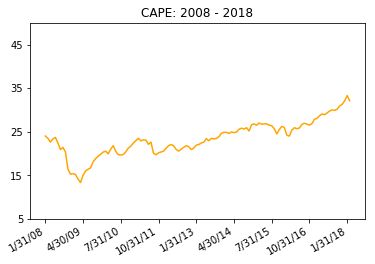

In [4]:
plt.plot(x, y, c = 'orange')                                    # Plot
axes = plt.gca()                                                # Define axes
plt.ylim(8, 50)                                                 # Set y axis limits
plt.gcf().autofmt_xdate()                                       # beautify the x-labels
# Adjust axis scales
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])

#Label graph, and show:
plt.title('CAPE: 2008 - 2018')
plt.show()


In [5]:
#Provide summary stats to benchmark index selection:
print("Summary Stats (CAPE)")
print("min", numpy.min(y))
print("max", numpy.max(y))
print("std", numpy.std(y))
print("mean", numpy.mean(y))
print("median", numpy.median(y))

Summary Stats (CAPE)
min 13.32366766
max 33.30734383
std 3.968825529864398
mean 23.390759648524586
median 23.356344865


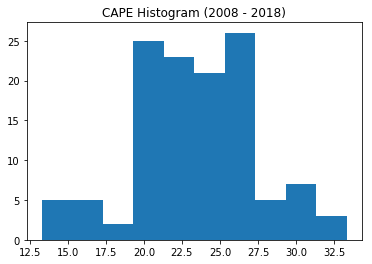

In [6]:
#Show Histogram of CAPE for past 18 Years:
plt.hist(y, bins='auto', orientation='vertical')
plt.title('CAPE Histogram (2008 - 2018)')
plt.show()

In [7]:
#Onto to the Smart BETA selection process:

In [8]:
#import the stock dataset, convert to csv, and read csv for analysis:
df1 = pd.read_csv('stocks.csv')

In [9]:
company = df1['ticker'].values

#Focus on TTM P/E:
pe = df1['pe_ratio_12m'].values               
print('P/E Set:', pe)

P/E Set: [18.14 15.24 25.71 18.25 18.85 26.56 15.63 14.18 10.51 23.54 10.16 15.03
 15.86 13.74 21.89 22.98 20.58 14.07 26.28 30.7  13.08 17.93 16.94 22.53
 18.   32.83 12.14 18.11 21.31]


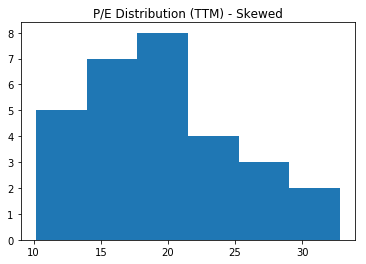

In [10]:
#More data visualization:
plt.hist(pe, bins='auto', orientation='vertical')
plt.title('P/E Distribution (TTM) - Skewed')
plt.show()

In [11]:
#Derive summary data to compare against CAPE analysis:
print("Summary Stats (P/E):")
print("p/e median:", numpy.median(pe))
print("p/e min:", numpy.min(pe))
print("p/e max:", numpy.max(pe))
print("p/e std:", numpy.std(pe))
print("p/e mean:", numpy.mean(pe))

Summary Stats (P/E):
p/e median: 18.11
p/e min: 10.16
p/e max: 32.83
p/e std: 5.618895080554382
p/e mean: 18.992068965517237


In [12]:
#Define the "value" bands. Adjust st.dev. range in proportion to dateset size:
beta_band = int(0.5*numpy.std(pe) + numpy.mean(pe))
alpha_band = int(numpy.mean(pe) - 0.5*numpy.std(pe))

In [13]:
print("sell any stock with P/E above:", beta_band)
print("buy any stock with P/E below:", alpha_band)

sell any stock with P/E above: 21
buy any stock with P/E below: 16


In [14]:
min_p = int(numpy.min(pe))
max_p = int(numpy.max(pe))

In [15]:
print("And Here is our Long/Short Smart Beta ETF:")
print(" ")
print("Buy these:", "\n", df1[df1.pe_ratio_12m <= alpha_band].ticker)
print(" ")
print("Sell these:","\n", df1[df1.pe_ratio_12m >= beta_band].ticker)

And Here is our Long/Short Smart Beta ETF:
 
Buy these: 
 1      AXP
6      DIS
7       GE
8       GS
10     IBM
11    INTC
12     JNJ
13     JPM
17     MRK
20     PFE
26      VZ
Name: ticker, dtype: object
 
Sell these: 
 2       BA
5      CVX
9       HD
14      KO
15     MCD
18    MSFT
19     NKE
23     UNH
25       V
28     XOM
Name: ticker, dtype: object
